In [64]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage.draw
import skimage
import skimage.io
%matplotlib notebook

In [59]:

# info = self.image_info[image_id]
#print(info){'id': '01300.png', 'source': 'auto', 'path': './dataset/images/val/01300.png', 'width': 1280, 'height': 720}
dataset_dir = "./dataset/images/"
mask_dir = os.path.join(dataset_dir, "../masks")
image_path = os.path.join(mask_dir, "01083.png")
image_path = os.path.abspath(image_path)
print("$$$$$$$$$$$", image_path)
image = skimage.io.imread(image_path)
# height, width = image.shape[:2]


$$$$$$$$$$$ /home/subtleseeker/Desktop/Mask_RCNN/samples/auto/dataset/masks/01083.png


In [72]:
lane = np.all(image == (0,255,0), axis=-1)
pedestrian = np.all(image == (255,0,255), axis=-1)
street_light = np.all(image == (255,255,0), axis=-1)
sign_board = np.all(image == (255,0,0), axis=-1)
traffic_light = np.all(image == (0,255,255), axis=-1)

In [61]:
np.unique(lane)

array([False,  True])

In [62]:
lane.shape

(720, 1280)

<IPython.core.display.Javascript object>


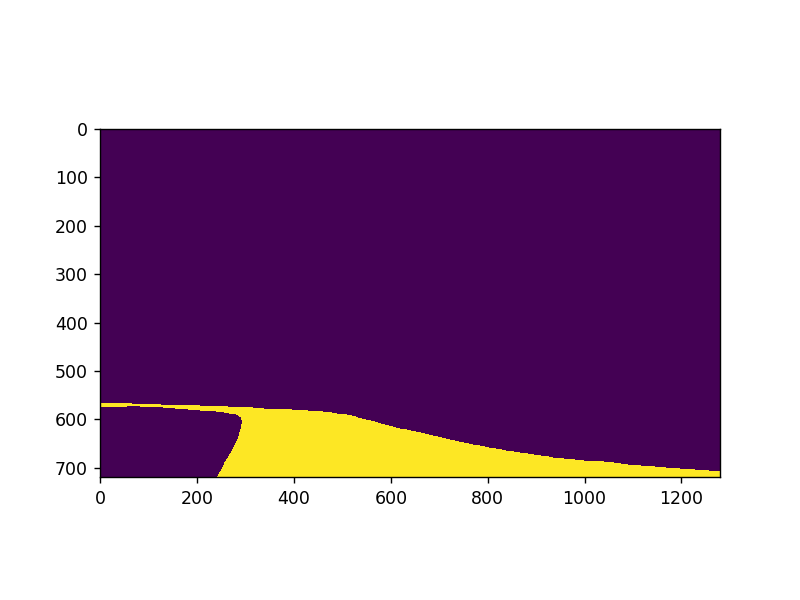

In [65]:
plt.imshow(lane)
plt.show()

In [67]:
np.unique(image)

array([  0, 255], dtype=uint8)

In [68]:
image.shape

(720, 1280, 3)

In [69]:
plt.imshow(image)
plt.show()

In [73]:
lane = np.all(image == (0, 255, 0), axis=-1)
pedestrian = np.all(image == (255, 0, 255), axis=-1)
vehicle = np.all(image == (0, 255, 255), axis=-1)
sign_board = np.all(image == (255, 0, 0), axis=-1)
street_light = np.all(image == (255, 255, 0), axis=-1)


In [74]:
lane.shape

(720, 1280)

In [76]:
mask = np.logical_or.reduce(lane, pedestrian, street_light, sign_board, traffic_light)
mask = mask.reshape(info["height"], info["width"], 1).astype(bool)

class_ids = np.zeros([info["height"], info["width"]], dtype=np.uint8)
class_ids = np.where(lane==True, 5)

TypeError: data type not understood

In [ ]:

import matplotlib.pyplot as plt
import cv2
print("Image.shape=",image.shape)
print(type(lane), lane[0].shape)
cv2.imshow("image",image)
cv2.imshow("lane",lane[0])
exit(1)

mask = np.zeros([info["height"], info["width"], 1],
                dtype=np.uint8)
for i, p in enumerate(info["polygons"]):
    # Get indexes of pixels inside the polygon and set them to 1
    rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
    mask[rr, cc, i] = 1

# Return mask, and array of class IDs of each instance. Since we have
# one class ID only, we return an array of 1s
return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

# def image_reference(self, image_id):
#     """Return the path of the image."""
#     info = self.image_info[image_id]
#     if info["source"] == "balloon":
#         return info["path"]b
#     else:
#         super(self.__class__, self).image_reference(image_id)

In [85]:
x = np.random.randint(0,2, (4,3)).astype(np.bool)
y = np.random.randint(0,2, (4,3)).astype(np.bool)
print(x)
print(y)

[[False  True  True]
 [ True  True  True]
 [ True False False]
 [False  True False]]
[[False False False]
 [False False  True]
 [False False False]
 [ True False False]]


In [88]:
x | y

array([[False,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True, False]])

In [91]:
z = np.where(x==True, "u", x)
z

array([['False', 'u', 'u'],
       ['u', 'u', 'u'],
       ['u', 'False', 'False'],
       ['False', 'u', 'False']], dtype='<U5')

In [93]:
image.shape

(720, 1280, 3)

In [95]:
plt.imshow(lane)
plt.show()

In [96]:
z

array([['False', 'u', 'u'],
       ['u', 'u', 'u'],
       ['u', 'False', 'False'],
       ['False', 'u', 'False']], dtype='<U5')

In [99]:
np.stack((z,z,z),axis=2).shape

(4, 3, 3)

In [3]:
from enum import Enum
import enum

In [4]:
class ClassName(enum.Enum):
    lane = 1
    pedestrian = 2
    vehicle = 3
    sign_board = 4
    street_light = 5
    traffic_light = 6

In [6]:
ClassName(1).name

'lane'